# Root-finding - Visualizations
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
---
<font color="#CC0000">[<b>PT-BR</b> content]</font>

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as manim
import numpy as np
import imageio

In [2]:
# definição da função f(x)
f = lambda x: x**3/4 + 3*x**2/4 - 3*x/2 - 2
# raízes adquiridas de forma analítica
raizes = [-4, -1, 2]

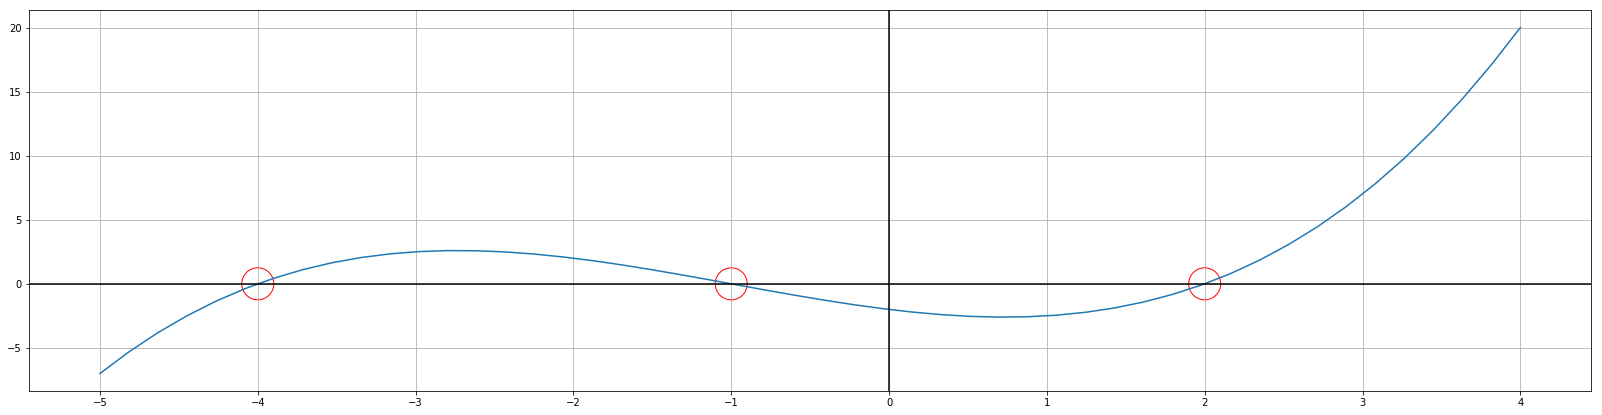

In [3]:
fig = plt.figure(figsize=(2048//72, 512//72))

x = np.linspace(-5, 4, 50)
plt.plot(x, f(x))
plt.scatter(raizes, [0]*3, s=1024,
            edgecolors='red', facecolor='none')
plt.xticks(range(-5, 4 + 1))
plt.grid(True)
plt.axhline(color='k')
plt.axvline(color='k')

fig.savefig('output/root-finding_analytical.png', bbox_inches='tight')
plt.show()

## 1. Método da bissecão
---

In [4]:
%%time
fig = plt.figure(figsize=(2048/72, 512/72))

e = 1e-3     # erro
a, b = 0, 3  # definição do intervalor [a,b]
# método da bisseção
xn = np.array([a, b, (a + b)/2])
while (abs(f(xn[-1])) or abs(b - a)) > e:
    if f(a)*f(xn[-1]) < 0:
        b = xn[-1]
    else:
        a = xn[-1]
    xn = np.append(xn, (a + b)/2)

x = np.linspace(xn[0], xn[1], 50)
c = [0]*x.size; c[-3:] = [1, 2, 3]
xfa, xfb = xn[0], 10

def animation(frame):
    global xfa, xfb
    plt.cla(); plt.clf()
    
    i, e = frame, xn[frame]
    
    fig.add_subplot(121)
    if i > 0:
        xfa = xn[i] if f(xn[i])/abs(f(xn[i])) == f(xfa)/abs(f(xfa)) else xfa
        xfb = xn[i] if f(xn[i])/abs(f(xn[i])) == f(xfb)/abs(f(xfb)) else xfb
    plt.fill_between([xfa, xfb], [-10, -10], [10, 10], alpha=0.1)
    plt.plot(x, f(x))
    plt.plot([raizes[2]]*2, [-100, 100], c='red', zorder=0)
    plt.plot([xn[:i + 1], xn[:i + 1]], [xn[:i + 1]*0, f(xn[:i + 1])], ':', c='black')
    plt.scatter(xn[:i + 1], xn[:i + 1]*0, c=c[-(i + 1):], cmap='coolwarm')
    plt.scatter(xn[:i + 1], f(xn[:i + 1]), c=c[-(i + 1):], cmap='coolwarm')
    plt.grid(True); plt.axhline(color='k'); plt.axvline(color='k')
    plt.xlim([xn[0] - 0.1, xn[1] + 0.1])
    plt.ylim([f(xn[0]) - 2, f(xn[1]) + 0.1])

    fig.add_subplot(122)
    plt.plot([-100, 100], [raizes[2]]*2, ':', c='red', zorder=0)
    plt.plot(np.arange(i + 1), xn[:i + 1], color='black', zorder=1)
    plt.scatter(np.arange(i + 1), xn[:i + 1], c=c[-(i + 1):], cmap='coolwarm', zorder=2, s=64)
    plt.grid(True)
    plt.xticks(np.arange(xn.size))
    plt.xlim([- 0.5, xn.size - 0.5])
    plt.ylim([xn[0] - 0.1, xn[1] + 0.1])

    return fig.canvas.draw()

anim = manim.FuncAnimation(fig, animation, frames=xn.size, interval=1000)
    
anim.save('output/root-finding_bisection.gif', writer="imagemagick", extra_args="convert")
plt.close()

# Solve repetition problem
! magick convert output/root-finding_bisection.gif -loop 0 output/root-finding_bisection.gif
! echo GIF exported and reconverted. Disregard any message above.

GIF exported and reconverted. Disregard any message above.
Wall time: 13.6 s


## 2. Método da falsa posição
---

In [5]:
%%time
fig = plt.figure(figsize=(2048/72, 512/72))

e = 1e-3     # erro
a, b = 0, 3  # definição do intervalor [a,b]
# método da falsa posição
xn = np.array([a, b, a - f(a)*(b - a)/(f(b) - f(a))])
while abs(f(xn[-1])) > e:
    if f(a)*f(xn[-1]) < 0:
        b = xn[-1]
    else:
        a = xn[-1]
    xn = np.append(xn, a - f(a)*(b - a)/(f(b) - f(a)))

x = np.linspace(xn[0], xn[1], 50)
c = [0]*x.size; c[-3:] = [1, 2, 3]
xfa, xfb = xn[0], 10

def animation(frame):
    global xfa, xfb
    plt.cla(); plt.clf()
    
    i, e = frame, xn[frame]
    
    fig.add_subplot(121)
    if i > 0:
        xfa = xn[i] if f(xn[i])/abs(f(xn[i])) == f(xfa)/abs(f(xfa)) else xfa
        xfb = xn[i] if f(xn[i])/abs(f(xn[i])) == f(xfb)/abs(f(xfb)) else xfb
    plt.fill_between([xfa, xfb], [-10, -10], [10, 10], alpha=0.1)
    plt.plot(x, f(x))
    plt.plot([raizes[2]]*2, [-100, 100], c='red', zorder=0)
    plt.plot([xn[:i + 1], xn[:i + 1]], [xn[:i + 1]*0, f(xn[:i + 1])], ':', c='black')
    plt.scatter(xn[:i + 1], xn[:i + 1]*0, c=c[-(i + 1):], cmap='coolwarm')
    plt.scatter(xn[:i + 1], f(xn[:i + 1]), c=c[-(i + 1):], cmap='coolwarm')
    plt.grid(True); plt.axhline(color='k'); plt.axvline(color='k')
    plt.xlim([xn[0] - 0.1, xn[1] + 0.1])
    plt.ylim([f(xn[0]) - 2, f(xn[1]) + 0.1])

    fig.add_subplot(122)
    plt.plot([-100, 100], [raizes[2]]*2, ':', c='red', zorder=0)
    plt.plot(np.arange(i + 1), xn[:i + 1], color='black', zorder=1)
    plt.scatter(np.arange(i + 1), xn[:i + 1], c=c[-(i + 1):], cmap='coolwarm', zorder=2, s=64)
    plt.grid(True)
    plt.xticks(np.arange(xn.size))
    plt.xlim([- 0.5, xn.size - 0.5])
    plt.ylim([xn[0] - 0.1, xn[1] + 0.1])

    return fig.canvas.draw()

anim = manim.FuncAnimation(fig, animation, frames=xn.size, interval=1000)
    
anim.save('output/root-finding_false_position.gif', writer="imagemagick", extra_args="convert")
plt.close()

# Solve repetition problem
! magick convert output/root-finding_false_position.gif -loop 0 output/root-finding_false_position.gif
! echo GIF exported and reconverted. Disregard any message above.

GIF exported and reconverted. Disregard any message above.
Wall time: 11.2 s


## 3. Método Newton-Raphson
---

In [6]:
%%time
fig = plt.figure(figsize=(2048/72, 512/72))

df = lambda x: 3*x**2/4 + 3*x/2 - 3/2  # primeira derivada de f(x) 
ddf = lambda x: 3*x/2 + 3/2            # segunda derivada de f(x)
e = 1e-3     # erro
a, b = 0, 3  # definição do intervalor [a,b]
# definição do melhor extremo do intervalo
if f(a)*ddf(a) > 0:
    xi = a
elif f(b)*ddf(b) > 0:
    xi = b
else:
    raise Exception('Intervalo inválido! Defina outro intervalo mais preciso')
# método newton-raphson
xn = np.array([a, b, xi - f(xi)/df(xi)])
while abs(xn[-1] - xi) > e:
    xi = xn[-1]
    xn = np.append(xn, xi - f(xi)/df(xi))

x = np.linspace(a, b, 50)
c = [0]*x.size; c[-3:] = [1, 2, 3]
xfa, xfb = xn[0], 10

def animation(frame):
    global xfa, xfb
    plt.cla(); plt.clf()
    
    i, e = frame, xn[frame]
    
    fig.add_subplot(121)
    if i > 0:
        xfa = xn[i] if f(xn[i])/abs(f(xn[i])) == f(xfa)/abs(f(xfa)) else xfa
        xfb = xn[i] if f(xn[i])/abs(f(xn[i])) == f(xfb)/abs(f(xfb)) else xfb
        plt.plot(x, df(e)*(x - e) + f(e), c='orange')
    plt.plot(x, f(x))
    plt.plot([raizes[2]]*2, [-100, 100], c='red', zorder=0)
    plt.plot([xn[:i + 1], xn[:i + 1]], [xn[:i + 1]*0, f(xn[:i + 1])], ':', c='black')
    plt.scatter(xn[:i + 1], xn[:i + 1]*0, c=c[-(i + 1):], cmap='coolwarm')
    plt.scatter(xn[:i + 1], f(xn[:i + 1]), c=c[-(i + 1):], cmap='coolwarm')
    plt.plot([xn[:i + 2], xn[:i + 2]], [xn[:i + 2]*0, f(xn[:i + 2])], ':', c='orange')
    plt.grid(True); plt.axhline(color='k'); plt.axvline(color='k')
    plt.xlim([a - 0.1, b + 0.1])
    plt.ylim([f(a) - 2, f(b) + 0.1])

    fig.add_subplot(122)
    plt.plot([-100, 100], [raizes[2]]*2, ':', c='red', zorder=0)
    plt.plot(np.arange(i + 1), xn[:i + 1], color='black', zorder=1)
    plt.scatter(np.arange(i + 1), xn[:i + 1], c=c[-(i + 1):], cmap='coolwarm', zorder=2, s=64)
    plt.grid(True)
    plt.xticks(np.arange(xn.size))
    plt.xlim([- 0.5, xn.size - 0.5])
    plt.ylim([a - 0.1, b + 0.1])

    return fig.canvas.draw()

anim = manim.FuncAnimation(fig, animation, frames=xn.size, interval=1000)
    
anim.save('output/root-finding_newton-raphson.gif', writer="imagemagick", extra_args="convert")
plt.close()

# Solve repetition problem
! magick convert output/root-finding_newton-raphson.gif -loop 0 output/root-finding_newton-raphson.gif
! echo GIF exported and reconverted. Disregard any message above.

GIF exported and reconverted. Disregard any message above.
Wall time: 5.22 s


## 4. Método das secantes
---

In [7]:
%%time
fig = plt.figure(figsize=(2048/72, 512/72))

e = 1e-3     # erro
a, b = 0, 3  # definição do intervalor [a,b]
# método das secantes
xo = a; xm = b
xn = np.array([xo])
while abs(f(xn[-1])) > e:
    xi = xm - (xm - xo)*f(xm)/(f(xm) - f(xo))
    xn = np.append(xn, xi)
    xo = xi

x = np.linspace(a, b, 50)
c = [0]*x.size; c[-3:] = [1, 2, 3]
xfa, xfb = xn[0], 10

def animation(frame):
    global xfa, xfb
    plt.cla(); plt.clf()
    
    i, e = frame, xn[frame]
    
    fig.add_subplot(121)
    if i > 0:
        xfa = xn[i] if f(xn[i])/abs(f(xn[i])) == f(xfa)/abs(f(xfa)) else xfa
        xfb = xn[i] if f(xn[i])/abs(f(xn[i])) == f(xfb)/abs(f(xfb)) else xfb
    m = (f(b) - f(e))/(b - e)
    plt.plot(x, m*(x - e) + f(e), c='orange')
    plt.plot(x, f(x))
    plt.plot([raizes[2]]*2, [-100, 100], c='red', zorder=0)
    plt.plot([xn[:i + 1], xn[:i + 1]], [xn[:i + 1]*0, f(xn[:i + 1])], ':', c='black')
    plt.scatter(xn[:i + 1], xn[:i + 1]*0, c=c[-(i + 1):], cmap='coolwarm')
    plt.scatter(xn[:i + 1], f(xn[:i + 1]), c=c[-(i + 1):], cmap='coolwarm')
    plt.plot([xn[:i + 2], xn[:i + 2]], [xn[:i + 2]*0, f(xn[:i + 2])], ':', c='orange')
    plt.grid(True); plt.axhline(color='k'); plt.axvline(color='k')
    plt.xlim([a - 0.1, b + 0.1])
    plt.ylim([f(a) - 2, f(b) + 0.1])

    fig.add_subplot(122)
    plt.plot([-100, 100], [raizes[2]]*2, ':', c='red', zorder=0)
    plt.plot(np.arange(i + 1), xn[:i + 1], color='black', zorder=1)
    plt.scatter(np.arange(i + 1), xn[:i + 1], c=c[-(i + 1):], cmap='coolwarm', zorder=2, s=64)
    plt.grid(True)
    plt.xticks(np.arange(xn.size))
    plt.xlim([- 0.5, xn.size - 0.5])
    plt.ylim([a - 0.1, b + 0.1])

    return fig.canvas.draw()

anim = manim.FuncAnimation(fig, animation, frames=xn.size, interval=1000)
    
anim.save('output/root-finding_secant.gif', writer="imagemagick", extra_args="convert")
plt.close()

# Solve repetition problem
! magick convert output/root-finding_secant.gif -loop 0 output/root-finding_secant.gif
! echo GIF exported and reconverted. Disregard any message above.

GIF exported and reconverted. Disregard any message above.
Wall time: 10.5 s
